# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
city_names = []
city_counter = 0
country = []
wind_speed = []
temp = []
clouds = []
lat = []
lng = []
humidity = []
dt = []
print("Loading Data")
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        #print(response)
        city_names.append(response['name'])
        country.append(response['sys']['country'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        dt.append(response['dt'])
        city_counter = city_counter + 1
        print("Processing Record " + str(city_counter) + ": " + str(response['id']) +  " " + response['name'])
    
print("Data Complete")    


Loading Data
Processing Record 1: 4030556 Rikitea
Processing Record 2: 1015776 Bredasdorp
Processing Record 3: 3674735 Miraflores
Processing Record 4: 4465088 Elizabeth City
Processing Record 5: 1258291 Rayachoti
Processing Record 6: 262462 Saint George
Processing Record 7: 964432 Port Alfred
Processing Record 8: 1006984 East London
Processing Record 9: 295620 Ashqelon
Processing Record 10: 1282256 Hithadhoo
Processing Record 11: 3833859 Barrow
Processing Record 12: 2161515 Kiama
Processing Record 13: 2075265 Busselton
Processing Record 14: 3355672 Luderitz
Processing Record 15: 5563397 Eureka
Processing Record 16: 2015306 Tiksi
Processing Record 17: 1803782 Lichuan
Processing Record 18: 344979 Lebu
Processing Record 19: 2163355 Hobart
Processing Record 20: 3418910 Upernavik
Processing Record 21: 2112802 Hasaki
Processing Record 22: 3573739 Esperance
Processing Record 23: 2737599 Saldanha
Processing Record 24: 3874787 Punta Arenas
Processing Record 25: 3424607 Tasiilaq
Processing Recor

Processing Record 208: 1267776 Kargil
Processing Record 209: 1680687 Tungao
Processing Record 210: 3374210 Sao Filipe
Processing Record 211: 5919850 Chapais
Processing Record 212: 57000 Hobyo
Processing Record 213: 2641598 Newport
Processing Record 214: 1280037 Shache
Processing Record 215: 2611738 Thyboron
Processing Record 216: 3839307 Rawson
Processing Record 217: 2794216 Knokke-Heist
Processing Record 218: 6089245 Norman Wells
Processing Record 219: 3430443 Necochea
Processing Record 220: 3672813 Pasca
Processing Record 221: 1263942 Manavalakurichi
Processing Record 222: 4372777 Vardo
Processing Record 223: 1644932 Ende
Processing Record 224: 3372472 Vila Franca do Campo
Processing Record 225: 6162949 Terrace
Processing Record 226: 1855612 Nara
Processing Record 227: 565289 Donskoye
Processing Record 228: 3146160 Melbu
Processing Record 229: 4699066 Houston
Processing Record 230: 2240449 Luanda
Processing Record 231: 3647444 Calabozo
Processing Record 232: 2258378 Loandjili
Process

Processing Record 414: 4013724 Camargo
Processing Record 415: 1501000 Kyshtovka
Processing Record 416: 650225 Kuopio
Processing Record 417: 4000900 La Paz
Processing Record 418: 6067472 Marystown
Processing Record 419: 69559 Zabid
Processing Record 420: 3460355 Jaciara
Processing Record 421: 1852357 Shimoda
Processing Record 422: 894701 Bulawayo
Processing Record 423: 4031637 Lavrentiya
Processing Record 424: 1242110 Kalmunai
Processing Record 425: 2020838 Lensk
Processing Record 426: 5476825 Los Alamos
Processing Record 427: 614455 Gori
Processing Record 428: 1804646 Huangchuan
Processing Record 429: 2191562 Dunedin
Processing Record 430: 4036284 Alofi
Processing Record 431: 1244926 Hambantota
Processing Record 432: 5983607 Inuvik
Processing Record 433: 3176923 Fiumicino
Processing Record 434: 1633070 Palembang
Processing Record 435: 3449747 Santa Vitoria do Palmar
Processing Record 436: 160677 Chake Chake
Processing Record 437: 1529484 Hami
Processing Record 438: 2181625 Te Anau
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dict = {
    "City": city_names,
    "Cloudiness": clouds,
    "Country": country,
    "Date": dt,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind_speed
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,92,PF,1552687962,100,-23.12,-134.97,76.95,26.53
1,Bredasdorp,68,ZA,1552687305,94,-34.53,20.04,73.00,12.75
2,Miraflores,88,CO,1552688310,78,5.20,-73.14,61.29,2.15
3,Elizabeth City,90,US,1552688054,60,36.30,-76.22,77.00,13.87
4,Rayachoti,0,IN,1552688310,67,14.06,78.75,64.62,4.38


In [12]:
city_data.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

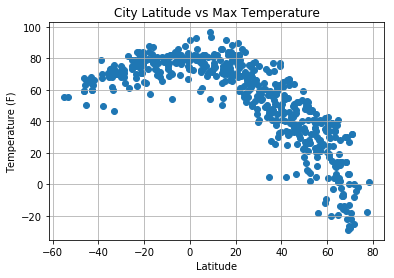

In [7]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureVsLat.png")
plt.show()

#### Latitude vs. Humidity Plot

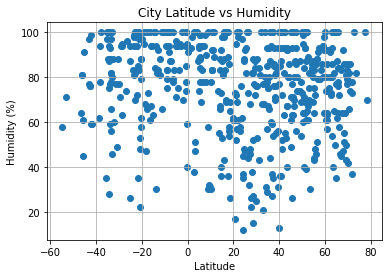

In [8]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

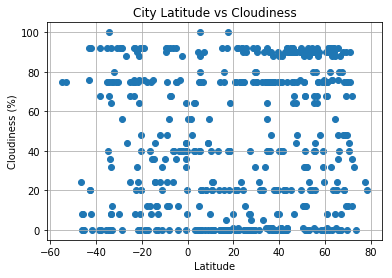

In [9]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

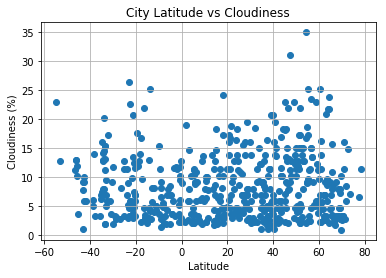

In [10]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("TemperatureVsCloudiness.png")
plt.show()